## *Select best cities in **California** based on differenet education level and also considering house value and monthly rent*

In [1]:
# Dependencies and Setup
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import rcParams
import scipy.stats as sts
import requests
import json
from pprint import pprint
import gmaps

# API Keys
from my_keys import g_key
gmaps.configure(api_key=g_key)

In [2]:
ca_2019_data=pd.read_csv("output_census/census_ca_2019.csv")
ca_2019_data.head()

NameError: name 'pd' is not defined

### filtering invalid entries

In [51]:
#ca_2019_data["House Value"].dtype
filt=((ca_2019_data["House Value"]>0)&
     (ca_2019_data["High School Rate"]>0)&
     (ca_2019_data["College Rate"]>0)&
     (ca_2019_data["Uneducated Rate"]>0)&
     (ca_2019_data['Monthly Rent']>0)&
     (ca_2019_data['Unemployment Rate']>0))
    
ca_2019_data=ca_2019_data.loc[filt,:]


In [52]:
ca_2019_data.head()

,Zipcode,Population,Median Age,Household Income,Per Capita Income,Poverty Rate,Unemployment Rate,House Value,House Construction Year,Monthly Owner Cost,...,White Population Rate,Black Population Rate,Hispanic Population Rate,Asian Population Rate,City,County,Lat,Lng,Housing_units,State
1,95148,48273.0,40.3,138763.0,41013.0,6.686968,3.281337,865000.0,1981,3114.0,...,22.540551,2.450645,26.113977,60.835250,Los Angeles,Los Angeles County,33.95,-118.25,12598,CA
2,95202,6066.0,39.2,14822.0,14840.0,45.812727,4.154303,216900.0,1942,1730.0,...,52.472799,20.128586,44.048797,12.858556,Los Angeles,Los Angeles County,33.96,-118.27,17127,CA
3,95203,15487.0,34.4,44922.0,22045.0,25.182411,5.604701,226400.0,1947,1358.0,...,58.862272,12.391038,57.938917,5.172080,Los Angeles,Los Angeles County,34.08,-118.31,24278,CA
4,95204,28667.0,37.0,53077.0,29062.0,15.244009,4.161580,244700.0,1953,1563.0,...,61.684166,7.758049,44.465762,9.966163,Los Angeles,Los Angeles County,34.06,-118.31,16345,CA
5,95205,38350.0,29.3,36444.0,14808.0,26.839635,4.419817,161200.0,1959,1142.0,...,64.500652,6.850065,71.582790,7.780965,Los Angeles,Los Angeles County,34.05,-118.29,20332,CA


In [53]:
ca_2019_data.columns


Index(['Zipcode', 'Population', 'Median Age', 'Household Income',
       'Per Capita Income', 'Poverty Rate', 'Unemployment Rate', 'House Value',
       'House Construction Year', 'Monthly Owner Cost', 'Monthly Rent',
       'Public Transport Rate', 'Personal Transport Rate',
       'Commute Time Public', 'Commute Time Car', 'High School Rate',
       'College Rate', 'Uneducated Rate', 'English Language',
       'Spanish Language', 'White Population Rate', 'Black Population Rate',
       'Hispanic Population Rate', 'Asian Population Rate', 'City', 'County',
       'Lat', 'Lng', 'Housing_units', 'State'],
      dtype='object')

In [6]:
ca_2019_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1021 entries, 1 to 1757
Data columns (total 30 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Zipcode                   1021 non-null   int64  
 1   Population                1021 non-null   float64
 2   Median Age                1021 non-null   float64
 3   Household Income          1021 non-null   float64
 4   Per Capita Income         1021 non-null   float64
 5   Poverty Rate              1021 non-null   float64
 6   Unemployment Rate         1021 non-null   float64
 7   House Value               1021 non-null   float64
 8   House Construction Year   1021 non-null   int64  
 9   Monthly Owner Cost        1021 non-null   float64
 10  Monthly Rent              1021 non-null   float64
 11  Public Transport Rate     1021 non-null   float64
 12  Personal Transport Rate   1021 non-null   float64
 13  Commute Time Public       379 non-null    float64
 14  Commute 

In [54]:
func_dict={'High School Rate':"mean",'College Rate':"mean","Uneducated Rate":"mean",
           'Zipcode':"first",'Lat':"first", 'Lng':"first",'House Value':"first",'Monthly Rent':"first"}

grp_object=ca_2019_data.groupby("County")
county_education=ca_2019_data.groupby("County").agg(func_dict)


## *Searching for best counties in **California** based on average highschool rating*

In [55]:
# searching top 5 cities in top 5 counties based on college rate

county_highschool=county_education.sort_values(by="High School Rate",ascending=False)
county_highschool.head()

,High School Rate,College Rate,Uneducated Rate,Zipcode,Lat,Lng,House Value,Monthly Rent
County,,,,,,,,
Lassen County,23.715773,6.072859,0.454861,99627,40.20,-120.10,70000.0,975.0
Inyo County,21.064399,10.704008,1.307080,96067,36.40,-117.10,283300.0,1097.0
Trinity County,20.919675,9.906939,0.690360,98672,40.20,-123.20,367000.0,1032.0
Alpine County,20.879121,0.915751,0.366300,99636,38.60,-119.80,116700.0,625.0
Mendocino County,19.916474,7.943262,0.654637,98548,39.21,-123.68,174900.0,1220.0


## *Searching for top 20 cities based on  Highschool Rating*

In [56]:
best_highschool=ca_2019_data.sort_values(by="High School Rate",ascending=False).reset_index(drop=True)
best_highschool_cities=best_highschool.loc[0:19,["Zipcode","City","High School Rate",
                                        "Lat","Lng","House Value","Monthly Rent"]]
best_highschool_cities

,Zipcode,City,High School Rate,Lat,Lng,House Value,Monthly Rent
0,97622,Los Altos,39.737991,37.3600,-122.0900,86600.0,513.0
1,99606,Weaverville,37.431694,40.7500,-122.9400,108300.0,719.0
2,99612,Blairsden-graeagle,35.571055,39.8000,-120.7000,121000.0,923.0
3,98548,Albion,33.364226,39.2100,-123.6800,174900.0,1220.0
4,96041,Yucca Valley,32.515337,34.2000,-116.5000,306400.0,669.0
5,99604,Trinity Center,30.587204,41.1000,-122.7000,60000.0,525.0
6,96781,Ladera Ranch,29.968203,33.5500,-117.6400,268800.0,943.0
7,98568,Dos Rios,29.947176,39.8000,-123.3000,208000.0,779.0
8,97346,Bishop,28.238866,37.5000,-118.3000,201300.0,738.0
9,99630,Lake City,28.225806,41.8000,-120.1000,84200.0,675.0


## *Plotting location of top 20 cities with best highschool rating*

In [44]:
fig=gmaps.figure()

city_lat=[]
city_lng=[]

for index,row in best_highschool_cities.iterrows():
    
    lat=row["Lat"]
    lng=row["Lng"]
    city_lat.append(lat)
    city_lng.append(lng) 

location=list(zip(city_lat,city_lng))

markers=gmaps.marker_layer(location)
fig.add_layer(markers)
fig

Figure(layout=FigureLayout(height='420px'))

##  *California County and city list sorted based on High School Rating*

In [57]:
top_highschool_cities=ca_2019_data.groupby(["County","City"])["High School Rate"].nlargest()
top_highschool_cities.head(20)

County          City             
Alameda County  Albany       1104     7.255942
                Berkeley     1109    12.872198
                             1108    12.457708
                             1100    11.599374
                             1103    10.961034
                             1107     8.831401
                Dublin       1058    15.516928
                Emeryville   1091    16.072431
                Fremont      1033    19.033909
                             1034    18.854167
                Hayward      1036    18.639053
                             1037    11.916708
                Oakland      1093    15.839137
                             1088    14.745121
                             1096    13.673352
                             1098    13.640618
                             1097    12.493701
                Pleasanton   1056    15.270483
                             1075     7.938301
                San Leandro  1067    10.143216
Name: High School Rate, dt

## *City with highest highschool rating*

In [58]:
city_name=best_highschool.loc[0,"City"]
county_name=best_highschool.loc[0,"County"]
high_school_rating=best_highschool.loc[0,"High School Rate"]

print(f"{city_name} city of{county_name} has highest high school rating:{round(high_school_rating,2)}")

Los Altos city ofSanta Clara County has highest high school rating:39.74


## *Searching for best counties in **California** based on average college rating*

In [59]:
# searching top 5 cities in top 5 counties based on college rate

county_college=county_education.sort_values(by="College Rate",ascending=False)
county_college.head()

,High School Rate,College Rate,Uneducated Rate,Zipcode,Lat,Lng,House Value,Monthly Rent
County,,,,,,,,
Marin County,9.581802,22.539120,1.192529,98107,37.97,-122.50,713400.0,1770.0
Alameda County,10.828287,19.649531,0.667058,97875,37.51,-121.99,129000.0,944.0
San Benito County,14.513171,16.495035,0.227692,98236,36.90,-121.20,426800.0,1149.0
Santa Cruz County,13.462571,16.431567,0.607013,98221,37.20,-122.20,429300.0,1194.0
Solano County,12.551124,16.402661,1.131040,97869,38.28,-122.02,142800.0,738.0


## *Searching for top 20 cities with highest college rating* 

In [45]:
best_college=ca_2019_data.sort_values(by="College Rate",ascending=False).reset_index(drop=True)
best_college_cities=best_college.loc[0:19,["Zipcode","City","College Rate",
                                        "Lat","Lng","House Value","Monthly Rent"]]
best_college_cities

,Zipcode,City,College Rate,Lat,Lng,House Value,Monthly Rent
0,97232,Cayucos,36.567926,35.50,-120.90,616100.0,1297.0
1,98102,El Sobrante,35.975868,37.95,-122.27,762500.0,1650.0
2,98107,San Rafael,34.611753,37.97,-122.50,713400.0,1770.0
3,98103,Richmond,33.884469,37.92,-122.34,739100.0,1681.0
4,98109,Greenbrae,33.698657,37.95,-122.55,727300.0,1874.0
5,97210,Bakersfield,33.417530,35.39,-118.99,770500.0,1272.0
6,97214,Bakersfield,33.258854,35.35,-119.06,581200.0,1346.0
7,98112,Bodega,32.656827,38.34,-122.94,998200.0,1660.0
8,98116,Bolinas,31.648255,38.00,-122.80,709300.0,1647.0
9,95816,Carlsbad,31.606489,33.13,-117.31,574700.0,1145.0


## *Plotting location of top 20 cities with best college rating*

In [60]:
fig=gmaps.figure()

city_lat=[]
city_lng=[]

for index,row in best_college_cities.iterrows():
    
    lat=row["Lat"]
    lng=row["Lng"]
    city_lat.append(lat)
    city_lng.append(lng) 

location=list(zip(city_lat,city_lng))

markers=gmaps.marker_layer(location)
fig.add_layer(markers)
fig

Figure(layout=FigureLayout(height='420px'))

## *California County and City List Sorted based on college rating*

In [61]:
top_college_cities=ca_2019_data.groupby(["County","City"])["College Rate"].nlargest()
top_college_cities.head(20)

County          City             
Alameda County  Albany       1104    25.431305
                Berkeley     1101    27.077328
                             1105    26.745439
                             1107    26.494202
                             1106    25.475079
                             1103    23.622583
                Dublin       1058    12.133325
                Emeryville   1091     7.285233
                Fremont      1034    15.104167
                             1033     5.758157
                Hayward      1037     5.105369
                             1036     4.142012
                Oakland      1086    30.670340
                             1087    28.677702
                             1094    27.779913
                             1095    27.422362
                             1090    22.954560
                Pleasanton   1075    25.976960
                             1056    13.840173
                San Leandro  1068    23.748535
Name: College Rate, dtype:

## *California city with highest college rating*

In [62]:
best_college=ca_2019_data.sort_values(by="College Rate",ascending=False).reset_index(drop=True)
city_name=best_college.loc[0,"City"]
county_name=best_college.loc[0,"County"]
college_rating=best_college.loc[0,"College Rate"]

print(f"{city_name} city of {county_name} has highest college rating:{round(college_rating,2)}")

Cayucos city of San Luis Obispo County has highest college rating:36.57


## *Searching for top 5 counties in **California** based on avg lowest uneducation rate*

In [63]:
county_education=county_education.sort_values(by="Uneducated Rate")
county_education.head()

,High School Rate,College Rate,Uneducated Rate,Zipcode,Lat,Lng,House Value,Monthly Rent
County,,,,,,,,
San Benito County,14.513171,16.495035,0.227692,98236,36.90,-121.20,426800.0,1149.0
Alpine County,20.879121,0.915751,0.366300,99636,38.60,-119.80,116700.0,625.0
Madera County,16.652564,11.887729,0.396746,97394,37.37,-119.74,250200.0,788.0
Lake County,14.692512,9.645338,0.398255,98563,38.81,-122.73,214500.0,725.0
San Francisco County,17.774905,8.976985,0.410902,97734,37.79,-122.42,216600.0,926.0


## *Searching for top 10 cities with lowest uneducation rate*

In [64]:
lowest_uneducated=ca_2019_data.sort_values(by="Uneducated Rate").reset_index(drop=True)
lowest_uneducated_cities=lowest_uneducated.loc[0:19,["Zipcode","City","Uneducated Rate",
                                        "Lat","Lng","House Value","Monthly Rent"]]
lowest_uneducated_cities

,Zipcode,City,Uneducated Rate,Lat,Lng,House Value,Monthly Rent
0,95946,San Diego,0.033419,32.81,-117.200,408700.0,1655.0
1,96790,Santa Ana,0.041610,33.71,-117.870,976400.0,1439.0
2,96748,Corona Del Mar,0.051387,33.60,-117.870,301500.0,874.0
3,98383,Empire,0.054692,37.67,-120.890,363700.0,1437.0
4,99338,Chico,0.060412,39.90,-121.800,327700.0,1146.0
5,98110,Belvedere Tiburon,0.061259,37.89,-122.470,705400.0,1555.0
6,98392,Hornitos,0.062873,37.40,-120.200,279200.0,1083.0
7,97133,Richgrove,0.063371,35.80,-119.106,411500.0,1130.0
8,98237,Los Gatos,0.068027,37.23,-122.000,193300.0,952.0
9,95665,La Puente,0.069719,34.03,-117.930,310300.0,1421.0


## *Plotting 10 cities with lowest uneducation rate* 

In [50]:
fig=gmaps.figure()

city_lat=[]
city_lng=[]

for index,row in lowest_uneducated_cities.iterrows():
    
    lat=row["Lat"]
    lng=row["Lng"]
    city_lat.append(lat)
    city_lng.append(lng) 

location=list(zip(city_lat,city_lng))

markers=gmaps.marker_layer(location)
fig.add_layer(markers)
fig

Figure(layout=FigureLayout(height='420px'))

## *Scatter plot highschool rating vs college rating*

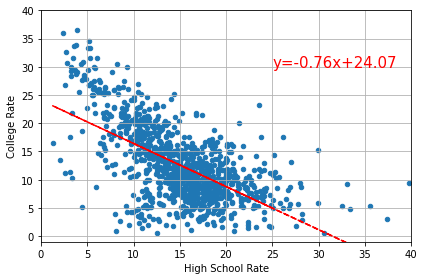

In [246]:
x_values=ca_2019_data["High School Rate"]
y_values=ca_2019_data["College Rate"]

(slope,intercept,rvalue, pvalue, stderr)=sts.linregress(x_values,y_values)
regress_values=slope*x_values+intercept
line_eq="y="+str(round(slope,2))+"x+"+str(round(intercept,2))

ca_2019_data.plot(kind="scatter",x="High School Rate",y="College Rate",grid=True)
plt.plot(x_values,regress_values,"r--")
plt.annotate(line_eq,(25,30),fontsize=15,color="red")
plt.xlim(0,40)
plt.ylim(-1,40)
plt.tight_layout()
plt.show()

## *Scatter plot highschool rating vs uneducation rate*

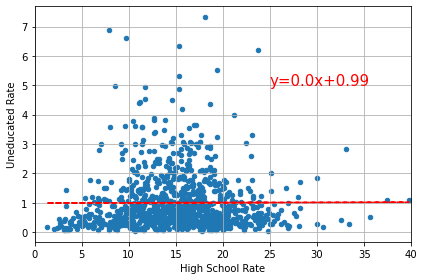

In [245]:
x_values=ca_2019_data["High School Rate"]
y_values=ca_2019_data["Uneducated Rate"]

(slope,intercept,rvalue, pvalue, stderr)=sts.linregress(x_values,y_values)
regress_values=slope*x_values+intercept
line_eq="y="+str(round(slope,2))+"x+"+str(round(intercept,2))

ca_2019_data.plot(kind="scatter",x="High School Rate",y="Uneducated Rate",grid=True)
plt.plot(x_values,regress_values,"r--")
plt.annotate(line_eq,(25,5),fontsize=15,color="red")
plt.xlim(0,40)
#plt.ylim(0,8)
plt.tight_layout()
plt.show()

## *Scatter plot college rating vs uneducation rate*

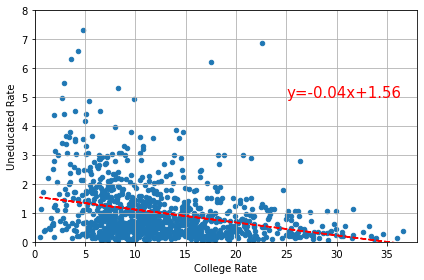

In [243]:
x_values=ca_2019_data["College Rate"]
y_values=ca_2019_data["Uneducated Rate"]

(slope,intercept,rvalue, pvalue, stderr)=sts.linregress(x_values,y_values)
regress_values=slope*x_values+intercept
line_eq="y="+str(round(slope,2))+"x+"+str(round(intercept,2))

ca_2019_data.plot(kind="scatter",x="College Rate",y="Uneducated Rate",grid=True)
plt.plot(x_values,regress_values,"r--")
plt.annotate(line_eq,(25,5),fontsize=15,color="red")
plt.xlim(0,38)
plt.ylim(0,8)
plt.tight_layout()
plt.show()

## *Scatter plot highschool rating vs house value*

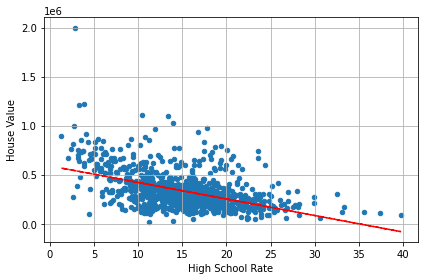

In [251]:
x_values=ca_2019_data["High School Rate"]
y_values=ca_2019_data["House Value"]

(slope,intercept,rvalue, pvalue, stderr)=sts.linregress(x_values,y_values)
regress_values=slope*x_values+intercept

ca_2019_data.plot(kind="scatter",x="High School Rate",y="House Value",grid=True)
plt.plot(x_values,regress_values,"r--")

plt.tight_layout()
plt.show()

## *Scatter plot highschool rating vs monthly rent*

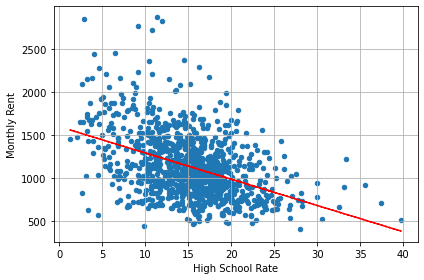

In [252]:
x_values=ca_2019_data["High School Rate"]
y_values=ca_2019_data["Monthly Rent"]

(slope,intercept,rvalue, pvalue, stderr)=sts.linregress(x_values,y_values)
regress_values=slope*x_values+intercept

ca_2019_data.plot(kind="scatter",x="High School Rate",y="Monthly Rent",grid=True)
plt.plot(x_values,regress_values,"r--")

plt.tight_layout()
plt.show()

## *Scatter plot college rating vs house value*

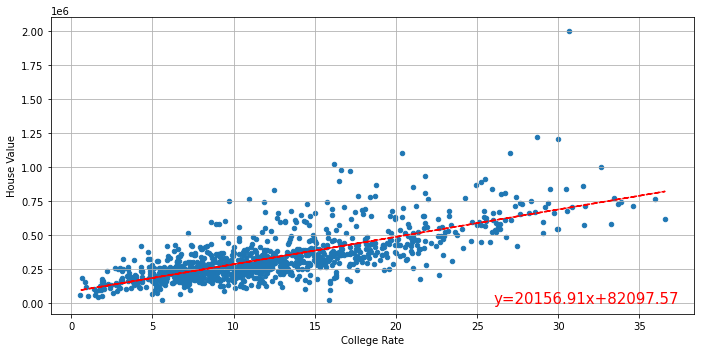

In [259]:
x_values=ca_2019_data["College Rate"]
y_values=ca_2019_data["House Value"]

(slope,intercept,rvalue, pvalue, stderr)=sts.linregress(x_values,y_values)
regress_values=slope*x_values+intercept
line_eq="y="+str(round(slope,2))+"x+"+str(round(intercept,2))

ca_2019_data.plot(kind="scatter",x="College Rate",y="House Value",grid=True,figsize=(10,5))
plt.plot(x_values,regress_values,"r--")
plt.annotate(line_eq,(26,5.5),fontsize=15,color="red")

plt.tight_layout()
plt.show()

## *Scatter plot college rating vs monthly rent*

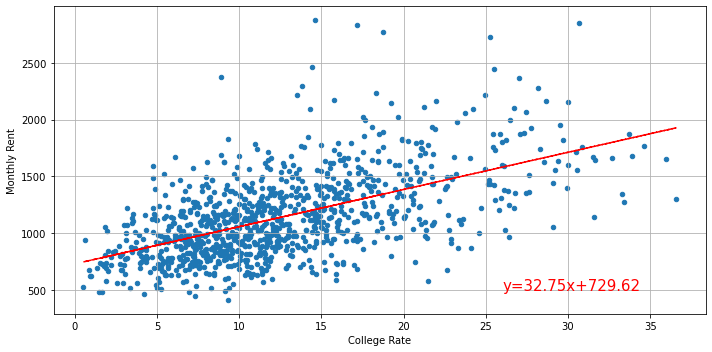

In [262]:
x_values=ca_2019_data["College Rate"]
y_values=ca_2019_data["Monthly Rent"]

(slope,intercept,rvalue, pvalue, stderr)=sts.linregress(x_values,y_values)
regress_values=slope*x_values+intercept
line_eq="y="+str(round(slope,2))+"x+"+str(round(intercept,2))

ca_2019_data.plot(kind="scatter",x="College Rate",y="Monthly Rent",grid=True,figsize=(10,5))
plt.plot(x_values,regress_values,"r--")
plt.annotate(line_eq,(26,500),fontsize=15,color="red")

plt.tight_layout()
plt.show()

## *Scatter plot high school rating vs unemployment rate*

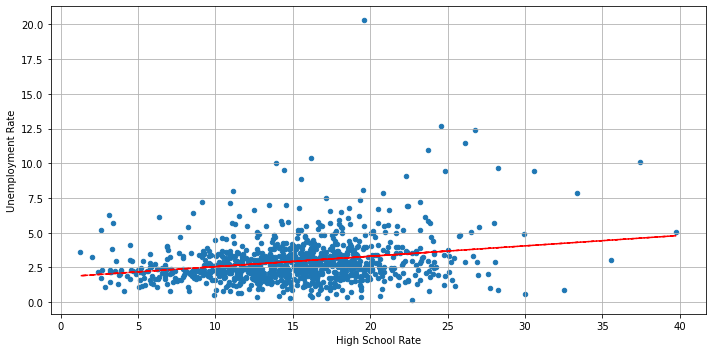

In [67]:
x_values=ca_2019_data["High School Rate"]
y_values=ca_2019_data["Unemployment Rate"]

(slope,intercept,rvalue, pvalue, stderr)=sts.linregress(x_values,y_values)
regress_values=slope*x_values+intercept
line_eq="y="+str(round(slope,2))+"x+"+str(round(intercept,2))

ca_2019_data.plot(kind="scatter",x="High School Rate",y="Unemployment Rate",grid=True,figsize=(10,5))
plt.plot(x_values,regress_values,"r--")

plt.tight_layout()
plt.show()

## *Scatter plot college rating vs unemployment rate*

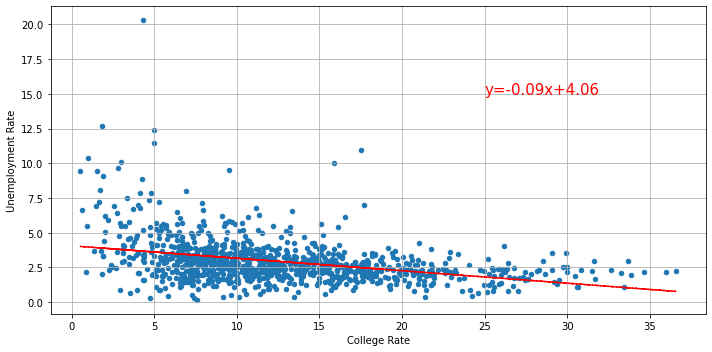

In [68]:
x_values=ca_2019_data["College Rate"]
y_values=ca_2019_data["Unemployment Rate"]

(slope,intercept,rvalue, pvalue, stderr)=sts.linregress(x_values,y_values)
regress_values=slope*x_values+intercept
line_eq="y="+str(round(slope,2))+"x+"+str(round(intercept,2))

ca_2019_data.plot(kind="scatter",x="College Rate",y="Unemployment Rate",grid=True,figsize=(10,5))
plt.plot(x_values,regress_values,"r--")
plt.annotate(line_eq,(25,15),fontsize=15,color="red")

plt.tight_layout()
plt.show()

## *Pie chart to see approx. educated and uneducated proportion in California*

In [279]:
ca_total_population=ca_2019_data['Population'].sum()
ca_uneducated=((ca_2019_data['Population']*ca_2019_data["Uneducated Rate"])/100).sum(axis=0)
ca_educated=(ca_total_population-ca_uneducated)

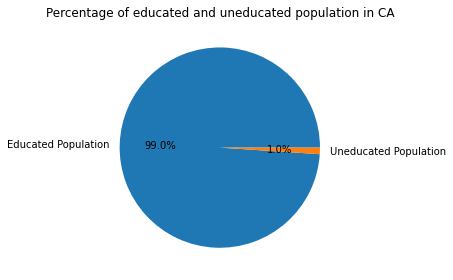

In [293]:
slices=[ca_educated,ca_uneducated]
labels=["Educated Population","Uneducated Population"]
plt.pie(slices,labels=labels,autopct="%1.1f%%")
plt.title("Percentage of educated and uneducated population in CA")
plt.tight_layout()
plt.show()